In [34]:
#引用包和包中的模块
import numpy as np
from scipy.optimize import leastsq
import pylab as pl

In [35]:
#定义要拟合的函数形式——正弦函数
def func(x,p):
    A,k,theta=p
    return A*np.sin(2*np.pi*k*x+theta)

#定义拟合的误差
def residual(p,y,x):
    return y-func(x,p) #x、y都是列表，故返回值也是个列表

In [36]:
#训练数据生成
x=np.linspace(0,-2*np.pi,100)#在[0,-2pi]中均匀生成100个数
A,k,theta=10,0.34,np.pi/6#真实数据函数参数
y0=func(x,[A,k,theta])
y1=y0+2*np.random.randn(len(x))#根据给定纬度，len(x)，生成[0,1)之间的数据，本例中有100个

In [37]:
p0 = [7, 0.2, 0]#初始值

In [40]:
#使用leastsq函数估计参数，主函数
#s="Test the number of iteration", 试验最小二乘法函数leastsq得调用几次error函数才能找到使得均方误差之和最小的A,k,theta
plsq = leastsq(residual, p0, args=(y1, x))
print("真实参数:", [A, k, theta]) 
print("拟合参数:", plsq[0])
print(plsq)

真实参数: [10, 0.34, 0.5235987755982988]
拟合参数: [-9.65982534  0.34019882  3.68695817]
(array([-9.65982534,  0.34019882,  3.68695817]), 1)


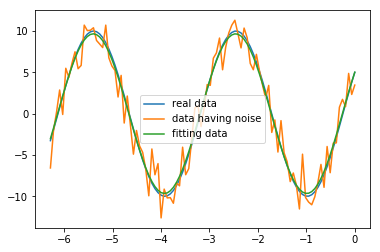

In [39]:
#拟合画图
pl.clf()
pl.plot(x, y0, label="real data")
pl.plot(x, y1, label="data having noise")
pl.plot(x, func(x, plsq[0]), label="fitting data")
pl.legend()
pl.show()